
<center>
    <img src="unnamed.png" width="300" alt="Newera logo"  />
</center> 

This Notebook is Prepared by Ayush Singh, Founder of Newera YT Channel, He had also taught the theory in the video, so I highly recommend to watch that video and then come back and start reading below.

## Building a breat cancer detection system

In this Notebook, you will build your own breat cancer detection system.

## Classification 

Classification is another supervised learning Approach, In Classification our output value **y** will be in discrete value like 0 or 1.  
Below are some examples:- 

 - Classification of Cat or Dog 
 - Prognostic Models  


Classification has different algorithms, which we will study in detail but for a couple of videos, we will be diving into the one of the most powerful classification algorithms, **Logistic Regression**.

## Logistic Regression 

Logistic Regression is a classification algorithms, which will tell you the probability that an instance belong to this class or not with some threshold. If our probability is greater than 0.5 or 50 % then we will say this belongs to the class, means positive_label **1** ot if lesser we denote negative class or vice versa **0**.

#### Example 

- What is the probability that this image is cat image? 

If our probability is above 0.5 which is our threshold, then it is a cat image **1** otherwise it is non cat **0**.

#### Fact about Logistic Regression

It is called as regression because it's underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function that is used in this method of classification.

### Let's start diving in logistic regression 

### Hypothesis Function Or Prediction Function


It does the same work as linear regression does, logistic regression computes the features weights and the bias term and multiply with the respected features and sum them up.

$\hat{Y} = h(x) =  \Theta_0*x_{0} + \Theta_1*x_{1} + \Theta_2*x_{2} \ + \Theta_3*x_{3} + \Theta_n*x_{n}$

**Vectorized form of above equation** 

$\hat{Y} = h(x) = (x^T\Theta)$

But one thing more it does, it computes the sigmoid of the hypothesis, which will enable the hypothesis to give output between 0 and 1. 

$\hat{Y} = h(x) =  \sigma(x^T\Theta)$

Let's denote $x^T\Theta$ as z, so we can write our function:- 
$\sigma(z)$

$\sigma(z)$ is a sigmoid function which outputs the number between 0 and 1

**Sigmoid Function Can be Defined as:-**
$\sigma(z) = \frac{1}{1+exp(-z)}$ 

$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$ 


It forms S shaped figure.

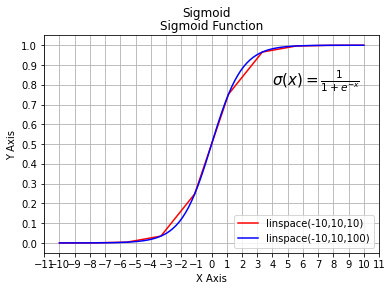

**We set the threshold** 
$\hat{Y}$ = 0 if prob < 0.5 else 1 if prob > 0.5

**Implementing sigmoid**

In [4]:
import numpy as np # for scientific computation 
import pandas as pd # for working with data
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.datasets import load_breast_cancer # dataset that we will be using 
import warnings # optional 
warnings.filterwarnings( "ignore" ) # optional 

In [1]:
def sigmoid(z): 
    '''
    input:  
        z : a scalar or an array 
    output: 
        h : sigmoid of z 
    '''
    h = 1 / (1 + np.exp(-z))
    
    return h

### Cost Function For Logistic Regression

The loss function for a single training example is
$$ J(\theta) = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$ 

* when the model predicts 1 and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1and the label is 0, the second term of the log loss becomes a large.


***Cost Function for m training examples***

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))$$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

### Gradient Descent [ Optimization Objective ]

To update our weights $\Theta$ we apply our gradient descent, to improve our weights at every iteration. We take out the partial derviative of our cost function, or in other words, how much the cost function will change if we change $\Theta$ little bit. 

The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:


$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(x^{(i)}-y^{(i)})x_j $$

* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

Here we are taking gradient step to reach to our global minimum, so that's why we are updating our previous theta parameter with the new one.


$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$


**Technical Note on $\alpha$ hyperparameter**


You have to tune the learning rate means you have to try different different rates and see your model how it performs. 

If you choose **very small learning rate**, it will be very very slow and it will never converge to the local minimum.  

If you choose **very large learning rate**, your model might diverge and never converge to the local minimum. 

### Guide on implementing vectorized Logistic Regression ####

**Hypothesis Function**

**z**= $ X . \Theta\$
<br>
And then you apply the sigmoid to each element in 'z': ℎ(𝑧)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑧)

- It has dimensions (m,1), where m is no. of training examples.   
<br>

**Vectorized Cost Function**
$$J(\Theta)= \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$


**Vectorized Gradient Descent** 
<br>
Above, we are taking out the gradient and updating  single weight $\theta_i$ at a time, but it will consume lot of time and space, instead of doing that, we can make a giant vector theta, which will contains all the feature weights, as given below:- 

$$\mathbf{\Theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$ 
<br> 
<br> 

* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1)  
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)


We have to update our theta values, so it is also vectorized:- 

$$\mathbf{\Theta} = \mathbf{\Theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [2]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        theta: your final weight vector
    '''
    m = len(y)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z =  np.dot(x, theta) 
        
        # get the sigmoid of z
        h = sigmoid(z) 
        
        # calculate the cost function
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) 

        # update the weights theta
        theta =  theta -  alpha/m * (np.dot(x.T, (h-y))) 
        
    return theta 

### Loading the data and Training 

In [5]:
data = load_breast_cancer()  
print(data.DESCR)

X = data.data  
y = data.target 

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, random_state=0 ) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
### Now, we will train our model with gradient descent ### 
theta = gradientDescent(X_train, Y_train, np.zeros((30)), 0.001, 700)
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The resulting vector of weights is [0.26710018, 0.42972718, 1.5782131, 0.98107781, 0.00252358, -0.0004329, -0.00379412, -0.00170445, 0.00473013, 0.00200138, 0.00016844, 0.03043851, -0.01000972, -0.79385023, 0.00017963, 5.59e-06, -0.00018409, 2.707e-05, 0.00048862, 6.335e-05, 0.27866735, 0.544369, 1.58675777, -1.15944894, 0.0032222, -0.00251253, -0.00721919, -0.00171032, 0.00677563, 0.00202829]


You can see above, the you got the feature weights of all the features. Now using that you will make predictions. 

### Testing our model ### 

In [7]:
def predictions(X, theta): 
    '''
    input: 
        X : input  
        theta : feature weights 
    output: 
        Y : 0 Or 1 
    '''
    Z = 1 / ( 1 + np.exp( - ( X.dot( theta )) ) )        
    Y = np.where( Z > 0.5, 1, 0 )        
    return Y

y_pred = predictions(X_test, theta) ### Predicting on the test set 

In [8]:
def test_logistic_regression(test_x, test_y, theta):
    y_hat = [] # making an empty list 
    for x in test_x:
        # get the label prediction 
        y_pred = predictions(x, theta) 
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [9]:
accuracy = test_logistic_regression(X_test, Y_test, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.9298


### Congratulations 😊😊  

You have developed your own end to end logistic regression model that can predict, whether the person has cancer or not, and even you haven't use any kind of external library for training. And also you have mastered logistic regression. 
<br>  

If you had completed this assignment, you have got both theoretical and practical knowledge, of one of the most popular algorithm **Logistic Regression**. 

If you are liking my effort, you can conider subscribing my youtube channel, and also following me on github, instagram and linkedin.  

Youtube:-  https://www.youtube.com/c/neweraa 
<br>
Linkedin:- https://www.linkedin.com/in/ayush-singh488/
<br>
instagram:- https://www.instagram.com/intelligentprogrammer123/  